# HW 04 (Oct 3rd) - Avina Chan
**1) Standard Error of the Means vs. Standard Deviation** <br> 

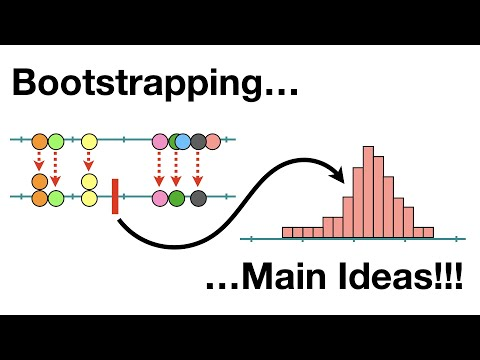

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

**Standard Error of the Means**: The standard error of the means is is calculated from the standard deviation of the historgram of means generated from the original dataset. This speaks to the precision/variabillity of the sample mean estimation based on the bootstrapping technique. <br> 
**Standard Deviation**: Standard deviation measures the dispersion of a set of datapoints from the mean. This will speak towards how spread out the values are around the median.<br>  

**Main differences**<br> 
The main difference between the two is that the Standard Error of the Means is calculated after employing a technique called bootstrapping. This is where they would take a dataset and draw out a sample size repeatedly to calculate many different means. Then using the new set of means the would create a historgram and calcualte the standrad deviation of that new dataset. Whereas, standard deviation of a dataset is calculated using the original dataset, with only one mean. <br> 

**Distinct Ideas?**<br> 
Standard Error of the Means speaks towards the uncertaininty of the mean estimate and how the generated samples will flutuate compared to each other, whereas standard deviation measures the dispersion of the dataset by showing how much variation there is from the mean of the dataset. 

**2) Confidence Interval (SEM method)** <br> 
To create a 95% confidence interval using the standard error of the mean, Additionally, if applicable, it can be assumed that the distribution generated by the bootrapped samples follow a standard distribution curve. This is due to the Central Limit Theorem, in which it states that the larger the sample size, the more the sample means created would resemble a normal distribution. This is due to the fact that as more samples are taken, the dispersion of the samples means will decrease, eliminating the extremes, balancing it out. Based on this assumption, the confidence interval can be calculated using a formula (CI = x̄ ± z * SEM). z is the critical value, which in this case would be 1.96 based on normal distribution. 

**3) Confidence Interval (Percentile method)** <br>  
A 95% confidence interval will estimate the range in which we expect the true population parameter to fall with 95% confidence. In order to this, rearrange the means generated by bootstrapping ordered from the samllest value to the largest. Then, take the 2.5th percentile and the 97.5th percentile of the boostrapped means, these values would serve as the lower and upper bound values of the confindence interval. This can be calculated by using the formulas (0.025 * N, and 0.975 * N). This can be done in python using the np.quantile(..) function, as illustrated below. 

In [6]:
lower_bound = np.quantile(bootstrapped_means, 0.025)  # 2.5th percentile
upper_bound = np.quantile(bootstrapped_means, 0.975)  # 97.5th percentile

The difference between the two main approaches, is that the method using SEM is an approximsation due to the central limit theorem. As mentioned, the SEM method relies on the approximation that the generated dataset displays a standard distribution curve, however if the sample size is small, it can deviate significantly from normaillity. This could lead to biased intervals or overall error in the coverage. This method also assumes that the confidence interval is entirley symmetric around the mean, which is not always true. The other method does not have any assumptions as it directly uses the distribution of the bootstrapped means. 

**Variabillity and Sample Size** <br> 
As the sample size increases the standard error of the means decreases. This is due to the fact that a larger sample will provide a more accurate estimate of the mean, canceling out the extreme values. Which will result in a greater precision in estimating the population parameter. <br> 
**Bootstrapped sample size** <br> 
it is important to maintain a consistent sample size when boostrapping in order to mimic the process of sampling from the population. It will help with maintainginthe same level of variabilit and uncertainty that would be present in the original sampling process. with a different sample size, it could lead to differeing variabilities. 
**Sampling without replacement?** <br> 
There is a difference between bootstrapped and original samples. Bootstrapped samples uses sampling with replacement therefore, each sample can have repesated values, whereas, original samples consits of unique observations. The dispersions created by bootrapped samples capture the varibillity in the estimates derived from the original samples. whereas, the original samples only provide estimates for population parameters, and does not account for dispersions that could happen from different possible samples. 

**Uncertainty of sample mean 

**ChatGPT Summary** <br> 
Sure! Here’s a summary of our conversation:

1. **Standard Error of the Mean (SEM) and Confidence Intervals**:
   - We discussed how SEM is influenced by sample size, with larger samples resulting in lower SEM and greater precision in estimating the population mean.
   - We explored the rationale behind using the same sample size in bootstrapping, emphasizing the importance of consistency and validity in estimates.

2. **Bootstrapped Samples**:
   - You asked about the differences between bootstrapped samples created by sampling with replacement versus original samples created by sampling without replacement.
   - We clarified that bootstrapped samples can contain repeated observations, while original samples consist of unique observations. This leads to different statistical properties and variability in the estimates derived from these samples.

3. **Confidence Interval Calculation**:
   - We touched on the calculation of confidence intervals using bootstrapped means, specifically how to find the 2.5th and 97.5th percentiles to create a 95% confidence interval.

If you need further details on any specific topic or if there's anything else you’d like to discuss, just let me know! <br> 
**ChatGPT Link**: https://chatgpt.com/share/66fca58c-7214-8001-9ad9-ad165f9a29cd

**4) Demonstrating Bootstrapping and Confidence Interval** 

In [7]:
import pandas as pd 
pingees = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")
pingees

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [12]:
# Flipper length was the selected variable that would be analyzed 
column = 'flipper_length_mm'
#this is used to remove the missing values in the data set 
data = data[data[column].notna()]

#this is the number of bootstrap samples selectic to generate 
n_bootstrap = 10000 
#this is the percentage that is used to generate  the confidence interval   
confidence_level = 0.95
#this represents the proportion of the distribution that is outside the confidence interval 
alpha = 1 - confidence_level

# Perform bootstrap sampling
boot_means = []
#this is initiates the loop 
for _ in range(n_bootstrap):
     # indicates that we are sampling 100% of the data, `replace = True` allows for sampling with replacement
    sample = data[column].sample(frac=1, replace=True) 
    # This line calculates the mean of the sample generated 
    boot_means.append(sample.mean()) 

# Calculate the confidence interval
lower_bound = np.quantile(boot_means, (alpha / 2)) 
upper_bound = np.quantile(boot_means,  (1 - alpha / 2))

print(f"Bootstrap 95% Confidence Interval for {column}: ({lower_bound:.2f}, {upper_bound:.2f})")


Bootstrap 95% Confidence Interval for flipper_length_mm: (199.40, 202.41)


In [13]:
import pandas as pd
import numpy as np

# Load the penguins dataset
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv'
data = pd.read_csv(url)

# Choose a column (for example, 'flipper_length_mm')
column = 'flipper_length_mm'
data = data[data[column].notna()]  # Remove missing values

# Set bootstrap parameters
n_bootstrap = 10000  # Number of bootstrap samples
confidence_level = 0.95
alpha = 1 - confidence_level

# Perform bootstrap sampling for the median
boot_medians = []
for _ in range(n_bootstrap):
    sample = data[column].sample(frac=1, replace=True)  # Bootstrap sampling
    boot_medians.append(sample.median())  # Calculate the median

# Calculate the confidence interval using quantiles
lower_bound = np.quantile(boot_medians, alpha / 2)
upper_bound = np.quantile(boot_medians, 1 - (alpha / 2))

print(f"Bootstrap 95% Confidence Interval for the median of {column}: ({lower_bound:.2f}, {upper_bound:.2f})")


Bootstrap 95% Confidence Interval for the median of flipper_length_mm: (195.00, 199.00)


**ChatGPT Summary** <br> 
Here’s a summary of our chat:

1. **Bootstrap Confidence Interval**: You requested guidance on producing a 95% bootstrap confidence interval for the population mean using the penguins dataset.

2. **Code Explanation**: I provided a Python code snippet for calculating the bootstrap confidence interval and explained each section of the code line by line. This included details on the for loop, bootstrap sampling, and how means are stored for later analysis.

3. **Alpha Definition**: We discussed the concept of **alpha** (\(\alpha\)), which represents the proportion of the distribution outside the confidence interval, and how it relates to the confidence level.

4. **Quantile vs. Percentile**: You requested to use quantiles instead of percentiles in the code. I modified the original code to utilize `np.quantile()` for calculating the confidence interval bounds and explained the changes made.

Let me know if there's anything else you'd like to add or clarify! <br> 
**ChatGPT Link**: https://chatgpt.com/share/66f8c38a-6b80-8001-9909-bc9e0c186684

**5) Distinguishing the role of population parameter and  sample statistic** <br> 
<br> 
**Population Parameters** <br> 
The population parameter is a fixed, "true" value in the population that statiscians are normally looking for, as theyre usually unknown. An example of this would be the mean of a population <br>
**Sample Statistics**<br> 
Sample Statistics are the estimates of the population parameter using the data we have. As gathering data for the whole population is unfeasable, sample statistics is used. <br> 
**Confidence Interval** <br> 
Confidence Interval is a range of values around the sample statistic that we are confident will contain the true population parameter. A 95% confidence interval means that we are 95% confident that the true population parameter will lie inside this range. <br> 
**Relationship**<br> 
By understanding the roles of each, it makes us understand that sample statistics are just estimates and not the exact population parameter. Whereas, confidence intervals help us account for the uncertainty of the estimated sample statistic. This can cause us to be more careful with our interpretation of our data.  

**6) Understanding Bootstrapping** <br> 
<br> 
**6.1) What is the process of bootstrapping?** <br> 
The process of bootstrapping is applied to a dataset. Based on the sample size of the data, the computer will use that sample size and pick that amount of samples from the dataset. However, it uses random sampling with replacement, meaning a sample can be drawn multiple times, while some won't appear at all. This creates many different unique datasets and mimics the variations that might occur if we were to sample the whole population. After generating all these new datasets, we calculate the statistic we want to estimate, such as the mean of a population for each of the datasets. This results in many different mean values, and when combined, they show the distribution of that statistic. Using this bootstrapped distribution, we can make an inference about the true population mean and calculate the confidence level of that estimate.

<br> 

**6.2) What is the main purpose of bootstrapping?**  
The main reason we use bootstrapping is to estimate a statistic of our dataset. For example, if we want to find the average height in Canada, it would be impossible to measure everyone's height. Therefore, it is not feasible to calculate the true population statistic. Bootstrapping is employed to get a very close estimate of it. <br> 

**6.3) If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?** <br> 
Say you have generated a hypothetical value using bootstrapping and believe it represents the population average. The bootstrap distribution you've created can help you determine whether your guess is plausible. This is called the confidence interval, which is a range of values that likely contains your estimate of the average. This range tells you how confident you are that the true average is within that interval. For example, with a 95% confidence interval, you can say that you're 95% confident the true parameter falls within that range.To calculate the confidence interval, you need to first sort the bootstrapped averages from smallest to largest. Then, you would take the 2.5th percentile and the 97.5th percentile of the bootstrapped distribution. The reason we use these values is that the interval between them contains 95% of the data. Those numbers become our confidence interval.


**7) Null Hypothesis** <br> 
A null hypothesis is when it shows that there are no effect or difference which means that the parameter equals to 0. If the confidence interval encompasses 0, we can not reject the null hypothesis even if our observed sample mean is significantly different from 0. The confidence interval represents the percentage in which we are confident that the sample statistic will fall into.Therefore there is the same amount of confidence the sample statistic will be the observed sample statistic and 0. This reflects uncertainty that the observe sample mean is reliable as the null hypothesis can not be rejected. This normally occur due to small sample sizes, as it results in wider confidence intervals. Alternatively, if you caxn reject the null hypothesis, it means that zero does not lie inside the confidence interval. a large sample size will lead to more precise estimates, reducing the likliehood for the null hypothesis to be acceptsed. 

**ChatGPT Summary** <br> 

Sure! Here’s a summary of our chat:

1. **Bootstrapping**: 
   - Discussed the process of bootstrapping, which involves generating multiple unique datasets through random sampling with replacement to estimate statistics like the mean.
   - Explained the main purpose of bootstrapping as estimating population statistics when it's impractical to sample the entire population.
   - Described how bootstrapping can help assess the plausibility of a hypothesized population average by calculating confidence intervals.

2. **Null Hypothesis**:
   - Defined the null hypothesis as a statement indicating no effect or difference, often represented as a parameter equaling zero.
   - Explained that if a confidence interval includes zero, the null hypothesis cannot be rejected, reflecting uncertainty about the observed sample mean's reliability.
   - Noted that small sample sizes typically lead to wider confidence intervals, while larger sample sizes provide more precise estimates, reducing the likelihood of accepting the null hypothesis.

3. **Grammar and Spelling Corrections**: 
   - Provided corrections for grammar and spelling in your explanations regarding bootstrapping and the null hypothesis.

If you need anything else or more details, just let me know!<br> 
**ChatGPT Link**: https://chatgpt.com/share/66fca5d9-eb54-8001-9da3-75ee027e4beb

**8) Vaccine Data Analysis** <br> 
An analysis will be conducted to see if the new vaccine created by AliTech is effective or not. <br> 
<br> 
**Hypothesis** <br>
**Null Hypothesis (H0)** : The vaccine has no effect on health scores, therefore it is not effective. This occurs when the mean for the differences in health scores is equal to zero. A confidence interval for the difference in health scores that includes a 0 results to a null hypothesis. <br> 
**Alternative Hypothesis (H1)** <br> 
The vaccine improves health scores, therefore, it is effective. This occurs when the mean for the differences in health scores are greater than zero. A confidence interval for the difference in health scores that is above 0 results in H1. <br> 
**Alternative Hypothesis (H2)** <br> 
The vaccine reduces health scores, therefore, it is not effective. This occurs when the mean for the differences in heath scores are lower than zero. A confidence interval for the difference in health scores that is lower than 0 results in H2. 

In [6]:
import pandas as pd
df  = pd.read_csv('STA130 HW3 Q8.csv')
df

,PatientID,Age,Gender,InitialHealthScore,FinalHealthScore
0,1,45,M,84,86
1,2,34,F,78,86
2,3,29,M,83,80
3,4,52,F,81,86
4,5,37,M,81,84
5,6,41,F,80,86
6,7,33,M,79,86
7,8,48,F,85,82
8,9,26,M,76,83
9,10,39,F,83,84


A new variable is added measuring the change in health scores. This is the coloumn that would be bootstrapped. 

In [9]:
df['ChangeInHealthScore'] = df['FinalHealthScore'] - df['InitialHealthScore']
df

,PatientID,Age,Gender,InitialHealthScore,FinalHealthScore,ChangeInHealthScore
0,1,45,M,84,86,2
1,2,34,F,78,86,8
2,3,29,M,83,80,-3
3,4,52,F,81,86,5
4,5,37,M,81,84,3
5,6,41,F,80,86,6
6,7,33,M,79,86,7
7,8,48,F,85,82,-3
8,9,26,M,76,83,7
9,10,39,F,83,84,1


A boxplot is created to illustrate the variable `ChangeInHealthScore`, highlighting the max, median, and min values of the dataset. 

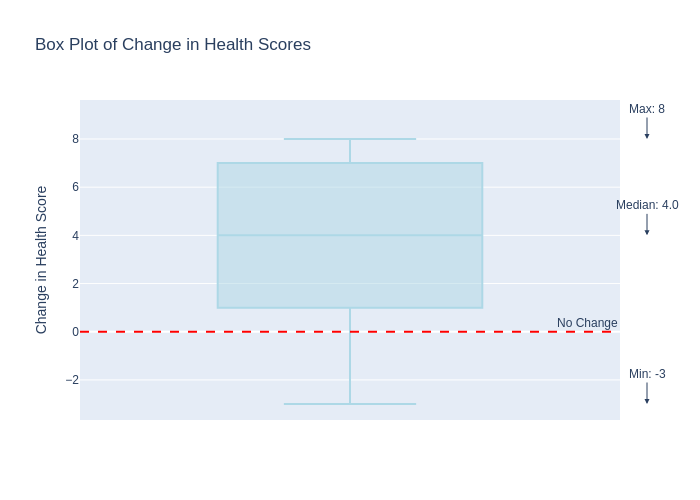

In [51]:
import plotly.express as px

# Calculate statistics
min_value = df['ChangeInHealthScore'].min()
max_value = df['ChangeInHealthScore'].max()
median_value = df['ChangeInHealthScore'].median()

# Create a box plot of Change in Health Scores
fig_box = px.box(df, y='ChangeInHealthScore', 
                 title="Box Plot of Change in Health Scores",
                 labels={'ChangeInHealthScore': 'Change in Health Score'},
                 color_discrete_sequence=['lightblue'])

# Add a horizontal line for zero change
fig_box.add_hline(y=0, line_color='red', line_dash='dash', 
                  annotation_text='No Change', annotation_position='top right')

# Add annotations for min, max, and median
fig_box.add_annotation(xref="paper", yref="y",
                       x=1.05, y=min_value,
                       text=f'Min: {min_value}', showarrow=True,
                       arrowhead=2, ax=0, ay=-30)

fig_box.add_annotation(xref="paper", yref="y",
                       x=1.05, y=median_value,
                       text=f'Median: {median_value}', showarrow=True,
                       arrowhead=2, ax=0, ay=-30)

fig_box.add_annotation(xref="paper", yref="y",
                       x=1.05, y=max_value,
                       text=f'Max: {max_value}', showarrow=True,
                       arrowhead=2, ax=0, ay=-30)

# Show the plot
fig_box.show(renderer="png")


A histogram is created to illustrate the variable `ChangeInHealthScore`

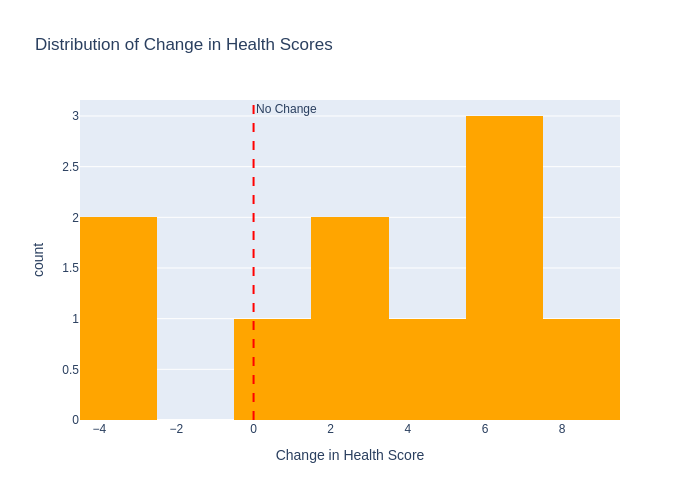

In [52]:
import plotly.express as px

# Create a histogram of Change in Health Scores
fig_hist = px.histogram(df, x='ChangeInHealthScore', nbins=10, 
                         title="Distribution of Change in Health Scores",
                         labels={'ChangeInHealthScore': 'Change in Health Score'},
                         color_discrete_sequence=['orange'])

# Adjust the bar gap
fig_hist.update_traces(marker=dict(line=dict(width=0)))  # Remove the outline
fig_hist.update_layout(bargap=0)  # Set bar gap to zero

# Add a vertical line for no change
fig_hist.add_vline(x=0, line_color='red', line_dash='dash', 
                   annotation_text='No Change', annotation_position='top right')

# Show the plot
fig_hist.show(renderer="png")


1000 bootstrap samples are generated, with a static seed number to make this analysis replicable. 

In [49]:
import numpy as np
import pandas as pd

# Assuming df is your DataFrame with ChangeInHealthScore
np.random.seed(42)  # Set a random seed for reproducibility
n_bootstraps = 1000  # Number of bootstrap samples
bootstrap_means = []

# Bootstrapping process
for _ in range(n_bootstraps):
    # Sample with replacement from the ChangeInHealthScore column
    bootstrap_sample = df['ChangeInHealthScore'].sample(frac=1, replace=True)
    # Calculate the mean of the bootstrap sample
    bootstrap_means.append(bootstrap_sample.mean())

# Convert to a DataFrame for easier analysis
bootstrap_df = pd.DataFrame({'Bootstrap Mean': bootstrap_means})

# Calculate the confidence interval
conf_interval = np.percentile(bootstrap_means, [2.5, 97.5])
mean_of_bootstrap = np.mean(bootstrap_means)

# Display results
print(f'Bootstrap Mean: {mean_of_bootstrap}')
print(f'95% Confidence Interval: {conf_interval}')


Bootstrap Mean: 3.3075
95% Confidence Interval: [0.7 5.5]


A histogram is generated of the bootstrapped means for the variable `ChangeinHealthScores`

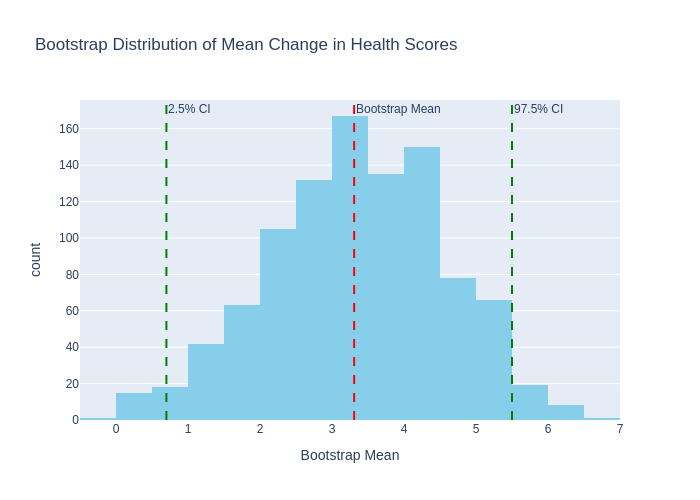

In [53]:
fig_bootstrap = px.histogram(bootstrap_df, x='Bootstrap Mean', 
                              nbins=30, title="Bootstrap Distribution of Mean Change in Health Scores",
                              labels={'Bootstrap Mean': 'Bootstrap Mean'},
                              color_discrete_sequence=['skyblue'])

# Add vertical lines for mean and confidence interval
fig_bootstrap.add_vline(x=mean_of_bootstrap, line_color='red', line_dash='dash',
                         annotation_text='Bootstrap Mean', annotation_position='top right')
fig_bootstrap.add_vline(x=conf_interval[0], line_color='green', line_dash='dash',
                         annotation_text='2.5% CI', annotation_position='top right')
fig_bootstrap.add_vline(x=conf_interval[1], line_color='green', line_dash='dash',
                         annotation_text='97.5% CI', annotation_position='top right')

# Show the plot
fig_bootstrap.show(renderer="png")

A boxplot is generated of the bootstrapped means for the variable `ChangeinHealthScores`

Bootstrap Mean: 3.3075
95% Confidence Interval: [0.7 5.5]


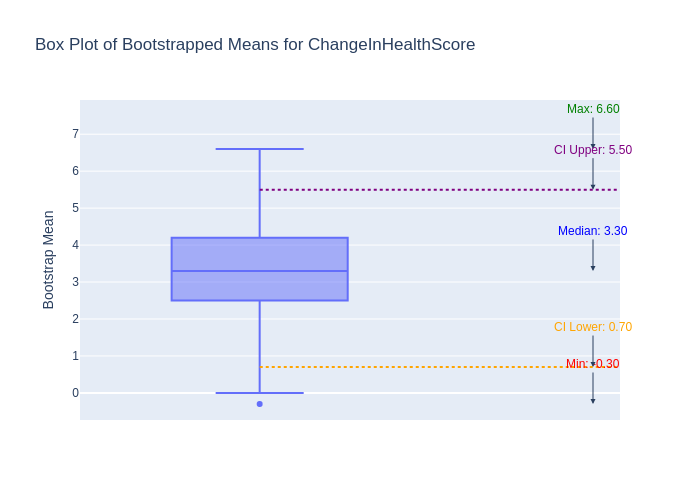

In [54]:
import numpy as np
import pandas as pd
import plotly.express as px

# Calculate additional statistics
min_value = np.min(bootstrap_means)
median_value = np.median(bootstrap_means)
max_value = np.max(bootstrap_means)

# Display results
print(f'Bootstrap Mean: {mean_of_bootstrap}')
print(f'95% Confidence Interval: {conf_interval}')

# Step 4: Create a boxplot of the bootstrapped means using Plotly
fig = px.box(bootstrap_df, y='Bootstrap Mean', 
             title='Box Plot of Bootstrapped Means for ChangeInHealthScore',
             labels={'Bootstrap Mean': 'Bootstrap Mean'})

# Add horizontal dotted lines for CI bounds
fig.add_shape(
    type='line',
    x0=0, y0=conf_interval[0], x1=1, y1=conf_interval[0],
    line=dict(color='orange', width=2, dash='dot'),
)

fig.add_shape(
    type='line',
    x0=0, y0=conf_interval[1], x1=1, y1=conf_interval[1],
    line=dict(color='purple', width=2, dash='dot'),
)

# Add annotations for min, median, max, and confidence interval
fig.add_annotation(
    xref='paper', yref='y', x=0.95, y=min_value,
    text=f'Min: {min_value:.2f}', showarrow=True, arrowhead=2,
    ax=0, ay=-40, font=dict(color='red')
)
fig.add_annotation(
    xref='paper', yref='y', x=0.95, y=median_value,
    text=f'Median: {median_value:.2f}', showarrow=True, arrowhead=2,
    ax=0, ay=-40, font=dict(color='blue')
)
fig.add_annotation(
    xref='paper', yref='y', x=0.95, y=max_value,
    text=f'Max: {max_value:.2f}', showarrow=True, arrowhead=2,
    ax=0, ay=-40, font=dict(color='green')
)
fig.add_annotation(
    xref='paper', yref='y', x=0.95, y=conf_interval[0],
    text=f'CI Lower: {conf_interval[0]:.2f}', showarrow=True, arrowhead=2,
    ax=0, ay=-40, font=dict(color='orange')
)
fig.add_annotation(
    xref='paper', yref='y', x=0.95, y=conf_interval[1],
    text=f'CI Upper: {conf_interval[1]:.2f}', showarrow=True, arrowhead=2,
    ax=0, ay=-40, font=dict(color='purple')
)

# Show the figure
fig.show(renderer="png")


**Findings and Discussions**<br> 
Through bootstrapping, an analysis was conducted on the overall health improvement from the new vaccine developed by AliTech. Bootstrapping generated the mean value of the change in health scores to be 3.3075. A 95% confidence interval was calculated to be [0.7, 5.5]. <br>
<br>
The calculated mean change in health score shows that, on average, individuals experienced an increase in their health scores after receiving the vaccine. This indicates a positive effect of the vaccine on health. The confidence interval of [0.7, 5.5] does not include zero, leading to the rejection of the null hypothesis. Furthermore, the confidence interval being above 0 suggests that there is an overall increase in final health scores, thereby rejecting hypothesis 2. This indicates that the change in health scores is statistically significant and supports the conclusion that the vaccine has a positive effect, allowing for the acceptance of the alternative hypothesis (H1).<br>
<br>
Based on the results of this bootstrapping analysis, it is concluded that the vaccine has a significant positive effect on health scores. While the current analysis suggests the vaccine is effective, it is important to consider the sample size. A small sample size of 10 may not accurately represent the broader population. A larger sample size could provide more reliable results and better reflect the true impact of the vaccine across different demographic groups. In addition to considering sample size, it is crucial to investigate the long-term effects of the vaccine on health scores and overall well-being. Longitudinal studies could help assess how sustained the positive impact is over time.

**ChatGPT Summary** <br> 

Here's a summary of our chat:

1. **Data Handling**:
   - Helped with importing a CSV file into an online Jupyter Notebook.
   - Assisted in generating a new column for calculating the difference in health scores in your dataset.

2. **Bootstrapping Analysis**:
   - Provided code to perform bootstrapping on the dataset to analyze the `ChangeInHealthScore`.
   - Calculated the 95% confidence interval for the bootstrapped means.

3. **Visualizations**:
   - Generated a box plot using Plotly to visualize the bootstrapped distribution.
   - Enhanced the box plot by adding annotations for minimum, median, maximum, and confidence intervals.
   - Added horizontal dotted lines to indicate the lower and upper bounds of the confidence intervals.

4. **Preferences**:
   - Noted your preference for using Plotly for visualizations.

Let me know if you need any further details or assistance! <br> 
**ChatGPT Link**: https://chatgpt.com/share/66fcba99-116c-8001-a402-5caf2ae50bb7

**9)** YES